<a href="https://colab.research.google.com/github/benasphy/Linear-Regression/blob/main/Normal%20Equation%20vs%20Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Normal Equation Theta: [5.08739013 2.96130371]
Gradient Descent Theta: [5.08739013 2.96130371]

Time Taken: Normal Equation = 0.011190 sec, Gradient Descent = 0.159704 sec


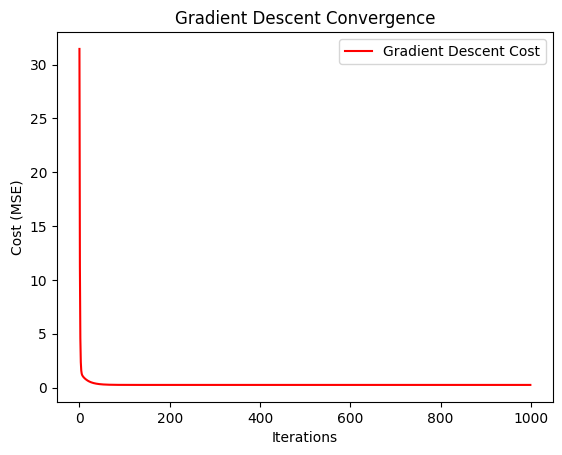

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Generate synthetic data (y = 3x + 5 + noise)
np.random.seed(42)
m = 1000  # Number of samples
X = 2 * np.random.rand(m, 1)
y = 3 * X + 5 + np.random.randn(m, 1) * 0.5  # Adding noise

# Add bias term (column of 1s) to X
X_b = np.c_[np.ones((m, 1)), X]

### 1️⃣ Normal Equation Solution ###
start_time = time.time()
theta_ne = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # (X^T X)^-1 X^T y
ne_time = time.time() - start_time

### 2️⃣ Gradient Descent Solution ###
def gradient_descent(X, y, alpha=0.1, n_iters=1000):
    m = len(y)
    theta = np.random.randn(2, 1)  # Initialize randomly
    cost_history = []

    for i in range(n_iters):
        gradients = (2/m) * X.T @ (X @ theta - y)
        theta -= alpha * gradients
        cost = np.mean((X @ theta - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

start_time = time.time()
theta_gd, cost_history = gradient_descent(X_b, y)
gd_time = time.time() - start_time

# Print results
print(f"Normal Equation Theta: {theta_ne.ravel()}")
print(f"Gradient Descent Theta: {theta_gd.ravel()}")
print(f"\nTime Taken: Normal Equation = {ne_time:.6f} sec, Gradient Descent = {gd_time:.6f} sec")

# Plot cost history
plt.plot(cost_history, label="Gradient Descent Cost", color='r')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()
